In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv');

In [ ]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df.sample(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
4245,AVpjEN4jLJeJML43rpUe,2016-06-08T03:50:06Z,2017-10-21T21:11:53Z,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,https://i.ebayimg.com/thumbs/images/g/crIAAOSw...,"841667103143,0841667103143,brandnewamazonkindl...",Amazon,B018Y225IA,2016-07-29T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025500/review...,I bought this kindle for my dad. The size is j...,Perfect combination of a tablet and reader,Ajay,http://www.ebay.com/itm/BRAND-NEW-Amazon-Kindl...
4922,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",Amazon,B018Y224PY,2016-09-12T00:00:00.000Z,2017-05-22T21:44:36Z,"2017-04-30T02:06:54.692Z,2017-06-07T08:20:52.340Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,I bought two of these as a birthday gift for m...,Great Gift,Awesome55544,"https://www.barcodable.com/upc/841667103150,ht..."
1497,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,Amazon,B06XB29FPF,2017-12-01T00:00:00.000Z,NaN,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/6036024/revie...,Great improved sound and built in smart hub is...,Can't live without Alexa,Bigmountain25,https://www.newegg.com/Product/Product.aspx%25...
191,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2017-12-16T00:00:00.000Z,NaN,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,Connects with Echo Dot and Bluetooth with ease...,Connects well,TlmFNP,https://reviews.bestbuy.com/3545/5875664/revie...
1099,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,Amazon,B06XB29FPF,2017-12-08T00:00:00.000Z,NaN,2018-04-26T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/6036024/revie...,Works great with WeMo and Philips Hue. Great s...,Very helpful,Dallasguy79,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-m74orv_l
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-m74orv_l
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=11ceb3ba5b444c9838fa637ee440dd628ede03bda2afa704be92e332071903a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-vk0mfg4i/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).replace('\\', '').replace('_', ' ')

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
df['reviews.text'] = df['reviews.text'].apply(lambda x:get_clean(x))

In [ ]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,i thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,didnt know how much i would use a kindle so we...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,i am 100 happy with my purchase i caught it on...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,solid entry level kindle great for kids gifted...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
!pip install -U scikit-learn
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.0.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, threadpoolctl, joblib, numpy
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,5), analyzer='char')

In [ ]:
X = tfidf.fit_transform(df['reviews.text'])
y = df['reviews.rating']

In [ ]:
X.shape, y.shape

((5000, 10000), (5000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(4000, 10000)

In [ ]:
clf = LinearSVC(C = 20, class_weight= 'balanced')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=20, class_weight='balanced')

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.00      0.00      0.00        10
           3       0.47      0.34      0.39        41
           4       0.54      0.52      0.53       272
           5       0.80      0.83      0.81       671

    accuracy                           0.72      1000
   macro avg       0.46      0.44      0.45      1000
weighted avg       0.70      0.72      0.71      1000



In [ ]:
x = 'this product is really bad. i do not like it'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([4])

In [ ]:
x = 'this product is really good. Thanks for speedy delivery'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([5])

In [ ]:
x = 'this product is moderate. Not good delivery system'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([3])

In [ ]:
 x = 'Disappointed about the product quality, Worst service. Really bad'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)  

array([1])

In [ ]:
x = 'The product is not bad at all.'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([5])

In [ ]:
import pandas as pd

In [ ]:
df.shape

(5000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [ ]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
reviews.id,29.0,1.858740e+08,2.084040e+07,108211188.0,185118492.0,188075721.0,198194852.0,202781248.0
reviews.numHelpful,5000.0,3.124000e-01,3.111582e+00,0.0,0.0,0.0,0.0,105.0
reviews.rating,5000.0,4.596800e+00,7.318038e-01,1.0,4.0,5.0,5.0,5.0


In [ ]:
df.isnull()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
count = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending = False)
missing_data = pd.concat([count, percentage], axis =1,
                         keys=['Count','Percentage'])

print('Count and percentage of missing values for this columns:')

missing_data

Count and percentage of missing values for this columns:


,Count,Percentage
reviews.id,4971,99.42
reviews.dateAdded,3948,78.96
reviews.title,13,0.26
sourceURLs,0,0.00
keys,0,0.00
dateAdded,0,0.00
dateUpdated,0,0.00
name,0,0.00
asins,0,0.00
brand,0,0.00


Percentage for default

True     95.3
False     4.7
Name: reviews.doRecommend, dtype: float64


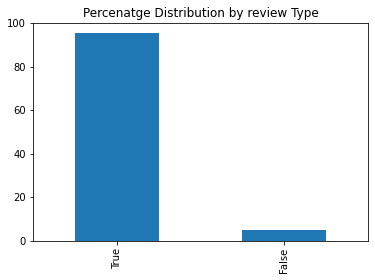

In [ ]:
 import matplotlib.pyplot as plt
 %matplotlib inline
 print('Percentage for default\n')
 print(round(df['reviews.doRecommend'].value_counts(normalize=True)*100,2))
 round(df['reviews.doRecommend'].value_counts(normalize=True)*100,2).plot(kind='bar')
 plt.title('Percenatge Distribution by review Type')
 plt.show()


In [ ]:
df.drop(columns = ['id',	'dateAdded'	,'dateUpdated'	, 'name',	'asins', 'brand', 'categories', 'primaryCategories',	'imageURLs',	'keys',	'manufacturer',	'manufacturerNumber',	'reviews.date',	'reviews.dateAdded',	'reviews.dateSeen'], inplace = True)

In [ ]:
import re
import string

def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
  text = re.sub('\w*\d\w*','', text)
  return text

cleand1 = lambda x: text_clean_1(x)

In [ ]:
df['Cleand_review'] = pd.DataFrame(df['reviews.text'].apply(cleand1))
df.head(10)

,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Cleand_review
0,False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,i thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,i thought it would be as big as small paper bu...
1,True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,this kindle is light and easy to use especiall...
2,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,didnt know how much i would use a kindle so we...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,didnt know how much i would use a kindle so we...
3,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,i am 100 happy with my purchase i caught it on...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,i am happy with my purchase i caught it on sa...
4,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,solid entry level kindle great for kids gifted...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,solid entry level kindle great for kids gifted...
5,False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this make an excellent ebook reader do not exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...,this make an excellent ebook reader do not exp...
6,True,187043823.0,0,5,https://redsky.target.com/groot-domain-api/v1/...,i ordered this for my daughter as i have the b...,Light Weight - Makes a world of difference whe...,LexieCrews,https://www.newegg.com/Product/Product.aspx%25...,i ordered this for my daughter as i have the b...
7,False,NaN,0,4,http://reviews.bestbuy.com/3545/5442403/review...,i bought my kindle about 2 months ago and the ...,not good quality,merry,https://www.newegg.com/Product/Product.aspx%25...,i bought my kindle about months ago and the b...
8,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,amazon kindle is always the best ebook upgrade...,best ebook,STEF,https://www.newegg.com/Product/Product.aspx%25...,amazon kindle is always the best ebook upgrade...
9,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,it is beyond my expectation and it can even sh...,Great Product,AEBY,https://www.newegg.com/Product/Product.aspx%25...,it is beyond my expectation and it can even sh...


In [ ]:
def text_clean_2(text):
  text = re.sub('[""""...]','',text)
  text = re.sub('\n','', text)
  return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
df['Cleand_review_updated'] = pd.DataFrame(df['reviews.text'].apply(cleaned2))
df.head(10)

,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Cleand_review,Cleand_review_updated
0,False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,i thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,i thought it would be as big as small paper bu...,i thought it would be as big as small paper bu...
1,True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,this kindle is light and easy to use especiall...,this kindle is light and easy to use especiall...
2,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,didnt know how much i would use a kindle so we...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,didnt know how much i would use a kindle so we...,didnt know how much i would use a kindle so we...
3,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,i am 100 happy with my purchase i caught it on...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,i am happy with my purchase i caught it on sa...,i am 100 happy with my purchase i caught it on...
4,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,solid entry level kindle great for kids gifted...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,solid entry level kindle great for kids gifted...,solid entry level kindle great for kids gifted...
5,False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,this make an excellent ebook reader do not exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...,this make an excellent ebook reader do not exp...,this make an excellent ebook reader do not exp...
6,True,187043823.0,0,5,https://redsky.target.com/groot-domain-api/v1/...,i ordered this for my daughter as i have the b...,Light Weight - Makes a world of difference whe...,LexieCrews,https://www.newegg.com/Product/Product.aspx%25...,i ordered this for my daughter as i have the b...,i ordered this for my daughter as i have the b...
7,False,NaN,0,4,http://reviews.bestbuy.com/3545/5442403/review...,i bought my kindle about 2 months ago and the ...,not good quality,merry,https://www.newegg.com/Product/Product.aspx%25...,i bought my kindle about months ago and the b...,i bought my kindle about 2 months ago and the ...
8,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,amazon kindle is always the best ebook upgrade...,best ebook,STEF,https://www.newegg.com/Product/Product.aspx%25...,amazon kindle is always the best ebook upgrade...,amazon kindle is always the best ebook upgrade...
9,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,it is beyond my expectation and it can even sh...,Great Product,AEBY,https://www.newegg.com/Product/Product.aspx%25...,it is beyond my expectation and it can even sh...,it is beyond my expectation and it can even sh...


In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = df['Cleand_review_updated']

Dependent_var = df['reviews.text']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test :', len(IV_test))
print('DV_test :', len(DV_test))
print('DV_test :', len(DV_test))


IV_train : 4500
IV_test : 500
DV_test : 500
DV_test : 500


In [ ]:
pip install -U scikit-learn

In [ ]:
#pip install sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [ ]:
#pip uninstall sklearn

In [ ]:
#pip uninstall scikit-learn

In [ ]:
#pip install sklearn

In [ ]:
 from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer', tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy : ', accuracy_score(predictions, DV_test))
print('Precision : ', precision_score(predictions, DV_test, average = 'weighted'))
print('Recall : ', recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.022
Precision :  0.026
Recall :  0.022


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
example = ["Disappointed"]

result = model.predict(example)

print(result)

['my first tablet was a kindle i was curious about the updated version very disappointed']


In [ ]:
example = ["Satisfied"]

result = model.predict(example)

print(result)

['very satisfied with product as do my family kids']
